In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.3 MB/s eta 0:00:00


Gia: 149.9999999999976
Diem bonus: 6.2180676328502384


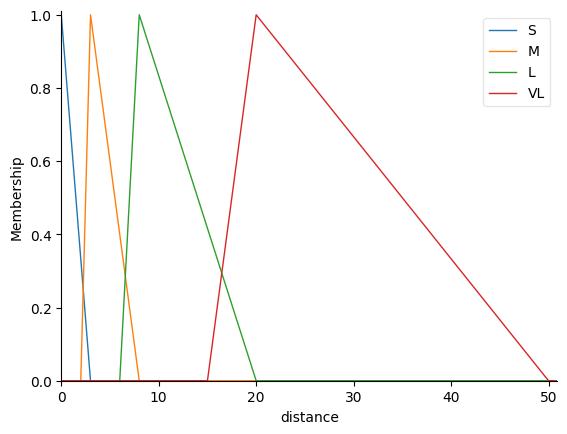

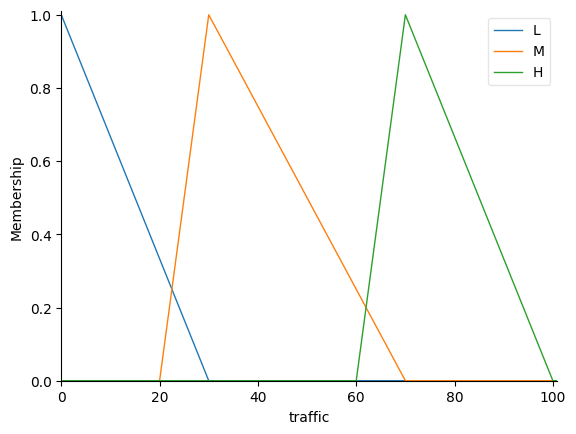

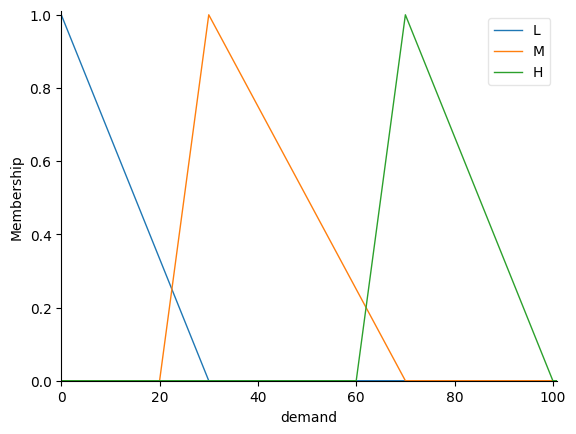

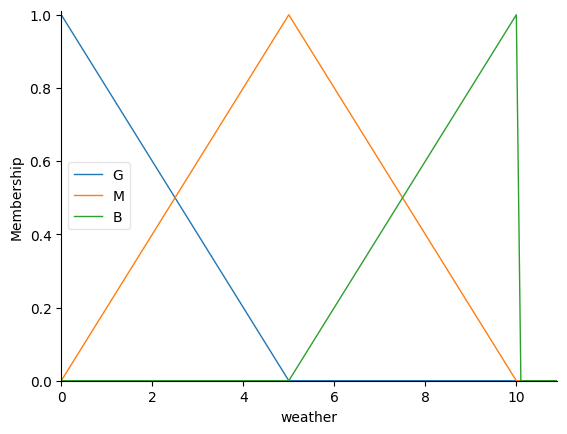

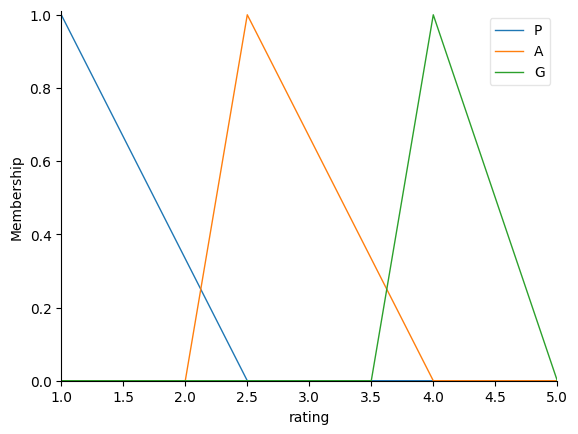

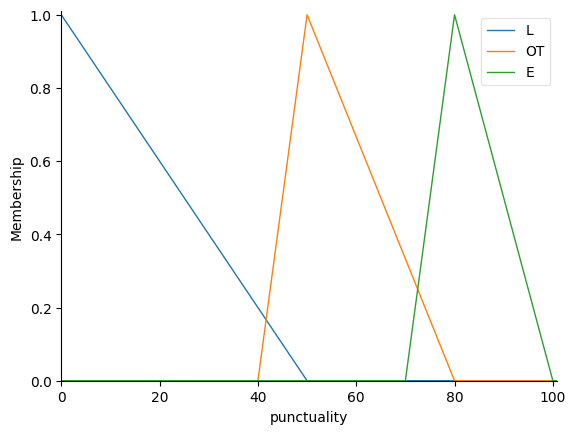

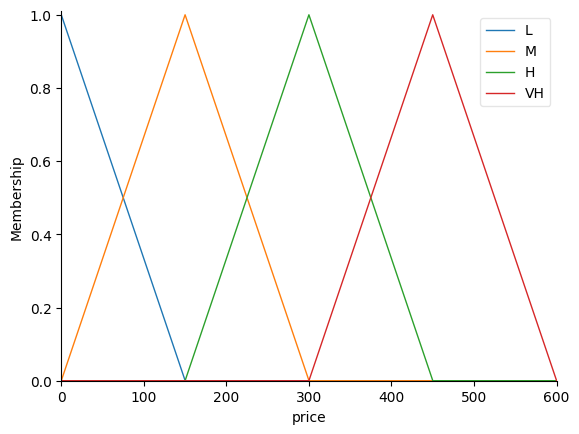

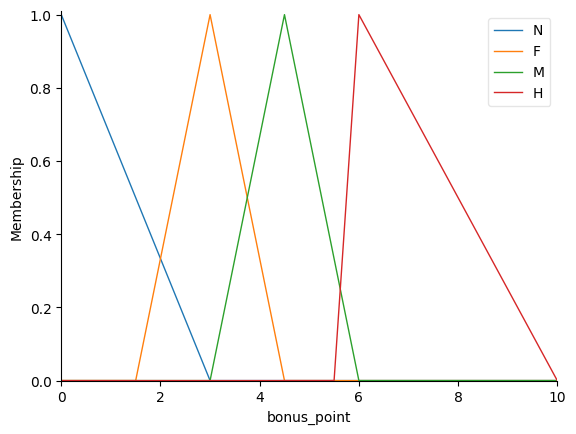

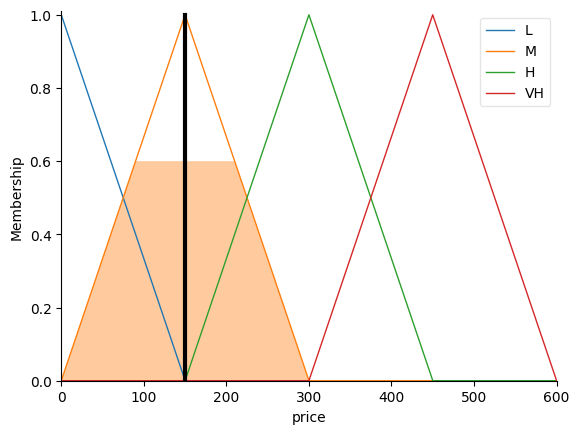

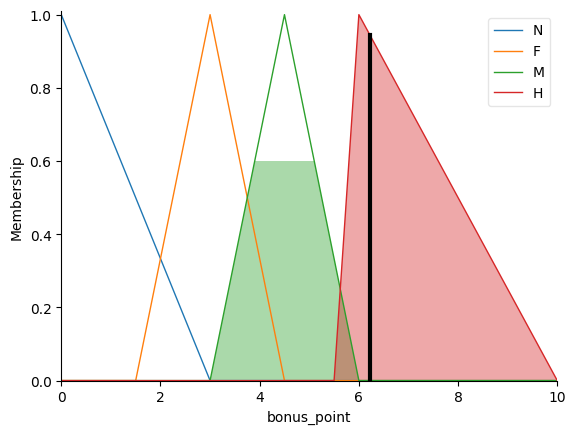

In [8]:
#BT1
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

distance = ctrl.Antecedent(np.arange(0,51,0.1),'distance')
traffic = ctrl.Antecedent(np.arange(0,101,0.1),'traffic')
demand = ctrl.Antecedent(np.arange(0,101,0.1),'demand')
weather = ctrl.Antecedent(np.arange(0,11,0.1),'weather')
rating = ctrl.Antecedent(np.arange(1,5.1,0.1),'rating')
punctuality = ctrl.Antecedent(np.arange(0,101,0.1),'punctuality')
price = ctrl.Consequent(np.arange(0,601,0.1),'price')
bonus_point = ctrl.Consequent(np.arange(0,10.1,0.1),'bonus_point')

distance['S'] = fuzz.trimf(distance.universe,[0,0,3])
distance['M'] = fuzz.trimf(distance.universe,[2,3,8])
distance['L'] = fuzz.trimf(distance.universe,[6,8,20])
distance['VL'] = fuzz.trimf(distance.universe,[15,20,50])
traffic['L'] = fuzz.trimf(traffic.universe,[0,0,30])
traffic['M'] = fuzz.trimf(traffic.universe,[20,30,70])
traffic['H'] = fuzz.trimf(traffic.universe,[60,70,100])

demand['L'] = fuzz.trimf(demand.universe,[0,0,30])
demand['M'] = fuzz.trimf(demand.universe,[20,30,70])
demand['H'] = fuzz.trimf(demand.universe,[60,70,100])
weather['G'] = fuzz.trimf(weather.universe,[0,0,5])
weather['M'] = fuzz.trimf(weather.universe,[0,5,10])
weather['B'] = fuzz.trimf(weather.universe,[5,10,10])

rating['P'] = fuzz.trimf(rating.universe,[1,1,2.5])
rating['A'] = fuzz.trimf(rating.universe,[2,2.5,4])
rating['G'] = fuzz.trimf(rating.universe,[3.5,4,5])

punctuality['L'] = fuzz.trimf(punctuality.universe,[0,0,50])
punctuality['OT'] = fuzz.trimf(punctuality.universe,[40,50,80])
punctuality['E'] = fuzz.trimf(punctuality.universe,[70,80,100])

price['L'] = fuzz.trimf(price.universe,[0,0,150])
price['M'] = fuzz.trimf(price.universe,[0,150,300])
price['H'] = fuzz.trimf(price.universe,[150,300,450])
price['VH'] = fuzz.trimf(price.universe,[300,450,600])

bonus_point['N'] = fuzz.trimf(bonus_point.universe,[0,0,3])
bonus_point['F'] = fuzz.trimf(bonus_point.universe,[1.5,3,4.5])
bonus_point['M'] = fuzz.trimf(bonus_point.universe,[3,4.5,6])
bonus_point['H'] = fuzz.trimf(bonus_point.universe,[5.5,6,10])

distance.view()
traffic.view()
demand.view()
weather.view()
rating.view()
punctuality.view()
price.view()
bonus_point.view()

rule1 = ctrl.Rule(distance['S'] & traffic['L'] & demand['L'],price['L'])
rule2 = ctrl.Rule(distance['S'] & traffic['M'] & demand['H'],price['M'])
rule3 = ctrl.Rule(distance['M'] & traffic['H'] & demand['H'],price['H'])
rule4 = ctrl.Rule(distance['L'] & traffic['M'] & weather['G'],price['M'])
rule5 = ctrl.Rule(distance['L'] & traffic['H'] & weather['B'],price['VH'])
rule6 = ctrl.Rule(distance['VL'] & traffic['H'] & demand['H'],price['VH'])
rule7 = ctrl.Rule(distance['M'] & traffic['L'] & demand['L'],price['M'])
rule8 = ctrl.Rule(distance['S'] & traffic['H'] & weather['B'],price['H'])
rule9 = ctrl.Rule(distance['VL'] & weather['B'],price['H'])
rule10 = ctrl.Rule(distance['M'] & traffic['M'] & weather['M'],price['M'])
rule11 = ctrl.Rule(rating['G'] & punctuality['E'] ,bonus_point['H'])
rule12 = ctrl.Rule(rating['A'] & punctuality['OT'] ,bonus_point['M'])
rule13 = ctrl.Rule(rating['P'] & punctuality['L'] ,bonus_point['N'])
rule14 = ctrl.Rule(distance['L'] & traffic['H'] & punctuality['OT'] ,bonus_point['H'])
rule15 = ctrl.Rule(distance['M'] & traffic['M'] & rating['G'] ,bonus_point['M'])
rule16 = ctrl.Rule(rating['P'] & punctuality['L'] ,bonus_point['N'])
rule17 = ctrl.Rule(distance['VL'] & weather['B'] & rating['G'],bonus_point['H'])
rule18 = ctrl.Rule(distance['S'] & rating['A'] & punctuality['OT'], bonus_point['F'])
rule19 = ctrl.Rule(distance['L'] & traffic['H'] & punctuality['L'],bonus_point['F'])
rule20 = ctrl.Rule(distance['M'] & weather['M'] & rating['G'],bonus_point['M'])

fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
sim1 = ctrl.ControlSystemSimulation(fuzzy_system)
sim1.input['distance'] = 5
sim1.input['traffic'] = 32
sim1.input['demand'] = 40
sim1.input['weather'] = 5
sim1.input['rating'] = 4
sim1.input['punctuality'] = 80
sim1.compute()
print("Gia:", sim1.output['price'])
print("Diem bonus:", sim1.output['bonus_point'])
price.view(sim1)
bonus_point.view(sim1)




54.99999999999998


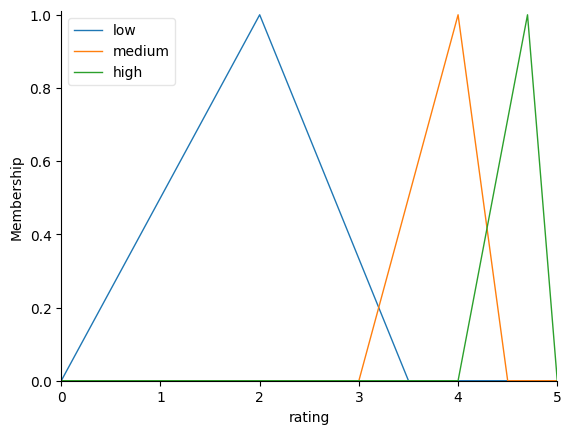

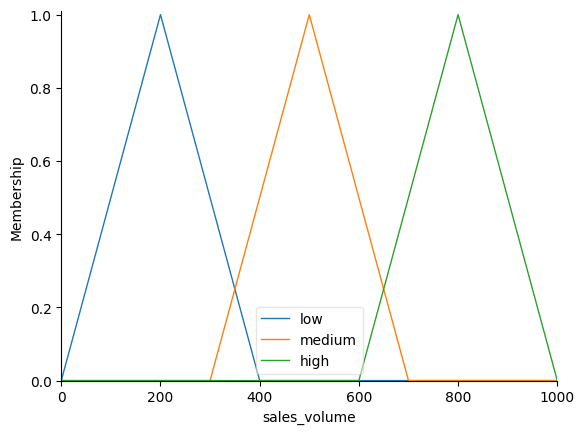

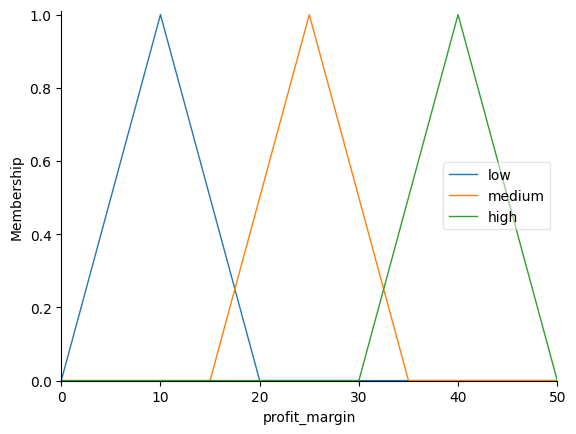

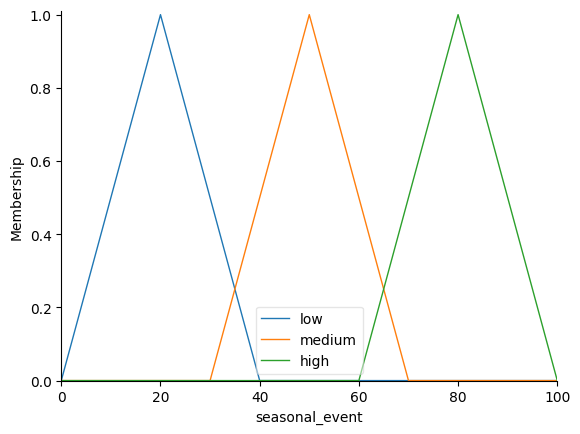

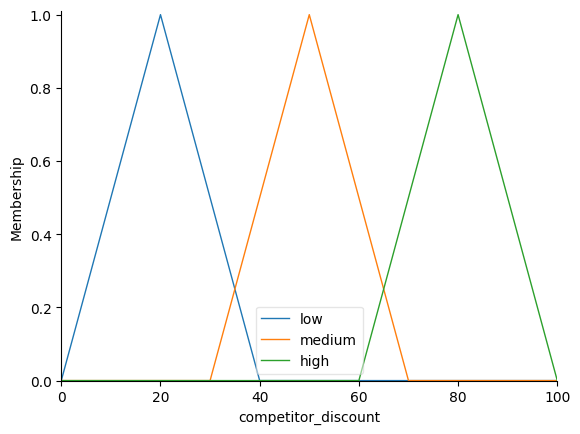

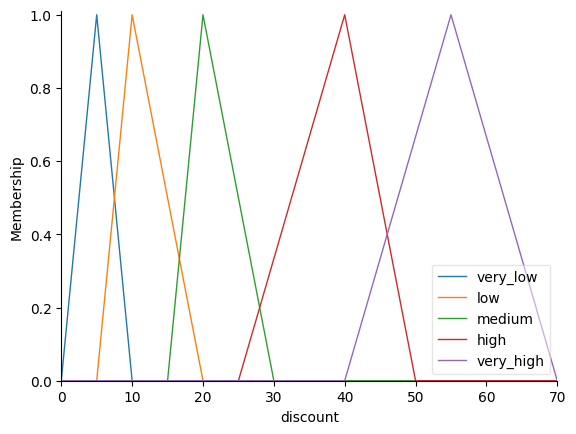

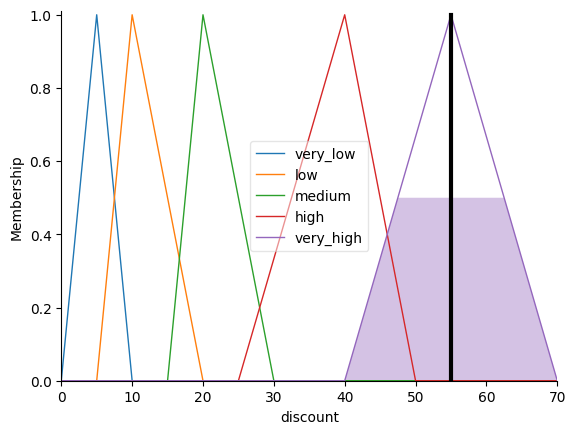

In [ ]:
#BT2
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'rating')
sales_volume = ctrl.Antecedent(np.arange(0, 1001, 1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 51, 1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonal_event')
competitor_discount = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_discount')
discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')


rating['low'] = fuzz.trimf(rating.universe, [0, 2, 3.5])
rating['medium'] = fuzz.trimf(rating.universe, [3, 4, 4.5])
rating['high'] = fuzz.trimf(rating.universe, [4, 4.7, 5])

sales_volume['low'] = fuzz.trimf(sales_volume.universe, [0, 200, 400])
sales_volume['medium'] = fuzz.trimf(sales_volume.universe, [300, 500, 700])
sales_volume['high'] = fuzz.trimf(sales_volume.universe, [600, 800, 1000])

profit_margin['low'] = fuzz.trimf(profit_margin.universe, [0, 10, 20])
profit_margin['medium'] = fuzz.trimf(profit_margin.universe, [15, 25, 35])
profit_margin['high'] = fuzz.trimf(profit_margin.universe, [30, 40, 50])

seasonal_event['low'] = fuzz.trimf(seasonal_event.universe, [0, 20, 40])
seasonal_event['medium'] = fuzz.trimf(seasonal_event.universe, [30, 50, 70])
seasonal_event['high'] = fuzz.trimf(seasonal_event.universe, [60, 80, 100])

competitor_discount['low'] = fuzz.trimf(competitor_discount.universe, [0, 20, 40])
competitor_discount['medium'] = fuzz.trimf(competitor_discount.universe, [30, 50, 70])
competitor_discount['high'] = fuzz.trimf(competitor_discount.universe, [60, 80, 100])

discount['very_low'] = fuzz.trimf(discount.universe, [0, 5, 10])
discount['low'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['medium'] = fuzz.trimf(discount.universe, [15, 20, 30])
discount['high'] = fuzz.trimf(discount.universe, [25, 40, 50])
discount['very_high'] = fuzz.trimf(discount.universe, [40, 55, 70])

rating.view()
sales_volume.view()
profit_margin.view()
seasonal_event.view()
competitor_discount.view()
discount.view()

rule1 = ctrl.Rule(rating['high'] & sales_volume['high'] & profit_margin['high'], discount['very_low'])
rule2 = ctrl.Rule(rating['low'] & sales_volume['low'] & profit_margin['high'], discount['high'])
rule3 = ctrl.Rule(seasonal_event['high'] & competitor_discount['high'], discount['very_high'])
rule4 = ctrl.Rule(rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount['medium'])
rule5 = ctrl.Rule(competitor_discount['low'] & profit_margin['low'] & sales_volume['high'], discount['very_low'])
rule6 = ctrl.Rule(rating['low'] & seasonal_event['low'], discount['medium'])
rule7 = ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount['very_high'])


system_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
system = ctrl.ControlSystemSimulation(system_ctrl)


system.input['rating'] = 4.3
system.input['sales_volume'] = 500
system.input['profit_margin'] = 15
system.input['seasonal_event'] = 80
system.input['competitor_discount'] = 70

system.compute()
print(system.output['discount'])
discount.view(sim=system)


24.518518518518505


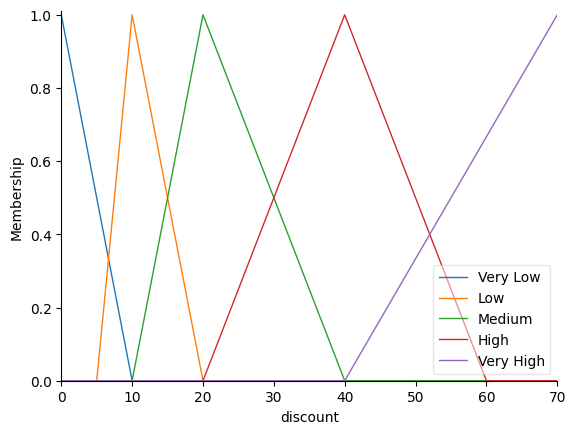

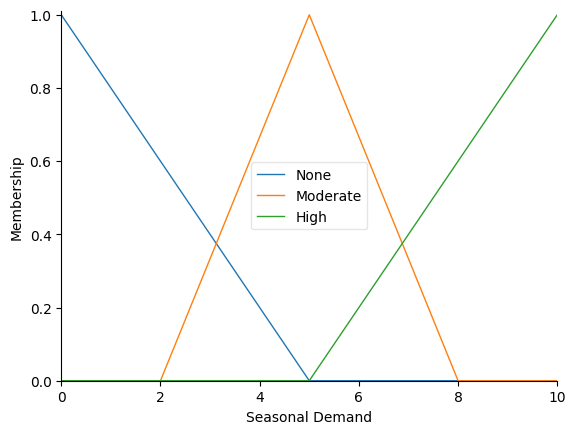

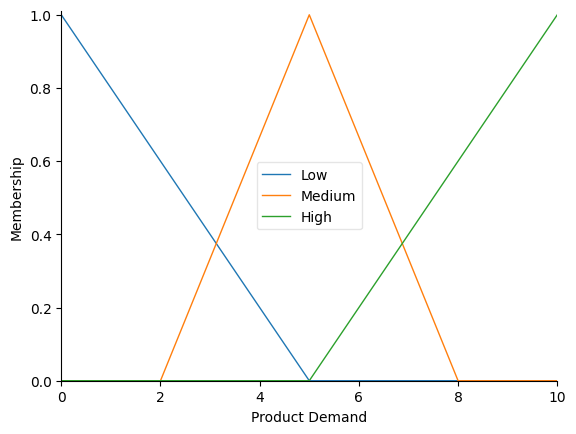

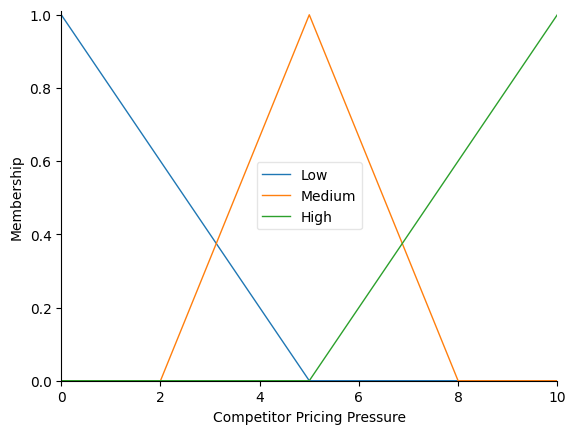

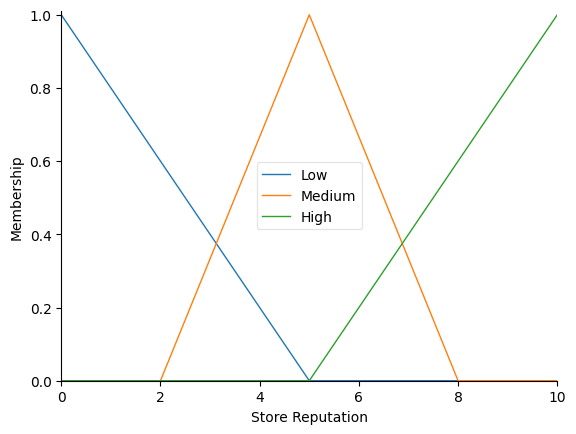

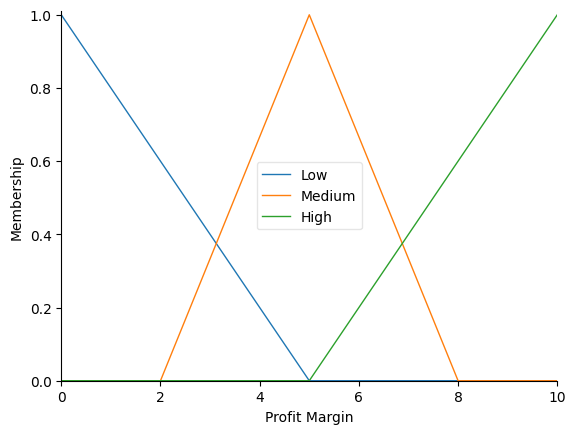

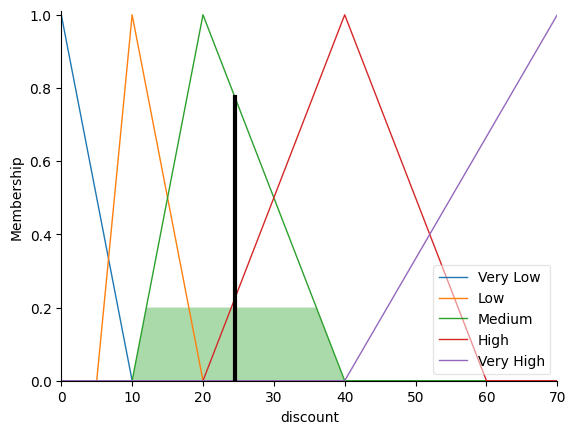

In [ ]:
#BT3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

product_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Product Demand')
competitor_pressure = ctrl.Antecedent(np.arange(0, 11, 1), 'Competitor Pricing Pressure')
store_reputation = ctrl.Antecedent(np.arange(0, 11, 1), 'Store Reputation')
profit_margin = ctrl.Antecedent(np.arange(0, 11, 1), 'Profit Margin')
seasonal_demand = ctrl.Antecedent(np.arange(0, 11, 1), 'Seasonal Demand')

discount = ctrl.Consequent(np.arange(0, 71, 1), 'discount')

product_demand['Low'] = fuzz.trimf(product_demand.universe, [0, 0, 5])
product_demand['Medium'] = fuzz.trimf(product_demand.universe, [2, 5, 8])
product_demand['High'] = fuzz.trimf(product_demand.universe, [5, 10, 10])

competitor_pressure['Low'] = fuzz.trimf(competitor_pressure.universe, [0, 0, 5])
competitor_pressure['Medium'] = fuzz.trimf(competitor_pressure.universe, [2, 5, 8])
competitor_pressure['High'] = fuzz.trimf(competitor_pressure.universe, [5, 10, 10])

store_reputation['Low'] = fuzz.trimf(store_reputation.universe, [0, 0, 5])
store_reputation['Medium'] = fuzz.trimf(store_reputation.universe, [2, 5, 8])
store_reputation['High'] = fuzz.trimf(store_reputation.universe, [5, 10, 10])

profit_margin['Low'] = fuzz.trimf(profit_margin.universe, [0, 0, 5])
profit_margin['Medium'] = fuzz.trimf(profit_margin.universe, [2, 5, 8])
profit_margin['High'] = fuzz.trimf(profit_margin.universe, [5, 10, 10])

seasonal_demand['None'] = fuzz.trimf(seasonal_demand.universe, [0, 0, 5])
seasonal_demand['Moderate'] = fuzz.trimf(seasonal_demand.universe, [2, 5, 8])
seasonal_demand['High'] = fuzz.trimf(seasonal_demand.universe, [5, 10, 10])

discount['Very Low'] = fuzz.trimf(discount.universe, [0, 0, 10])
discount['Low'] = fuzz.trimf(discount.universe, [5, 10, 20])
discount['Medium'] = fuzz.trimf(discount.universe, [10, 20, 40])
discount['High'] = fuzz.trimf(discount.universe, [20, 40, 60])
discount['Very High'] = fuzz.trimf(discount.universe, [40, 70, 70])


discount.view()
seasonal_demand.view()
product_demand.view()
competitor_pressure.view()
store_reputation.view()
profit_margin.view()
rule1 = ctrl.Rule(product_demand['High'] & competitor_pressure['Low'] & profit_margin['Low'], discount['Very Low'])
rule2 = ctrl.Rule(product_demand['Low'] & competitor_pressure['High'] & profit_margin['High'], discount['High'])
rule3 = ctrl.Rule(store_reputation['High'] & profit_margin['Medium'] & seasonal_demand['High'], discount['Medium'])
rule4 = ctrl.Rule(competitor_pressure['High'] & seasonal_demand['High'] & profit_margin['High'], discount['Very High'])
rule5 = ctrl.Rule(store_reputation['Low'] & product_demand['Medium'] & profit_margin['Low'], discount['Medium'])
rule6 = ctrl.Rule(product_demand['High'] & seasonal_demand['None'] & competitor_pressure['Low'], discount['Very Low'])
rule7 = ctrl.Rule(profit_margin['High'] & competitor_pressure['Medium'] & seasonal_demand['Moderate'], discount['Medium'])


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
discount_simulation = ctrl.ControlSystemSimulation(control_system)

discount_simulation.input['Product Demand'] = 3
discount_simulation.input['Competitor Pricing Pressure'] = 5
discount_simulation.input['Store Reputation'] = 2
discount_simulation.input['Profit Margin'] = 4
discount_simulation.input['Seasonal Demand'] = 1


discount_simulation.compute()
print(discount_simulation.output['discount'])
discount.view(sim=discount_simulation)



muc do ket hop don hang: 75.0000000000004
muc do uu tien: 4.999999999999999


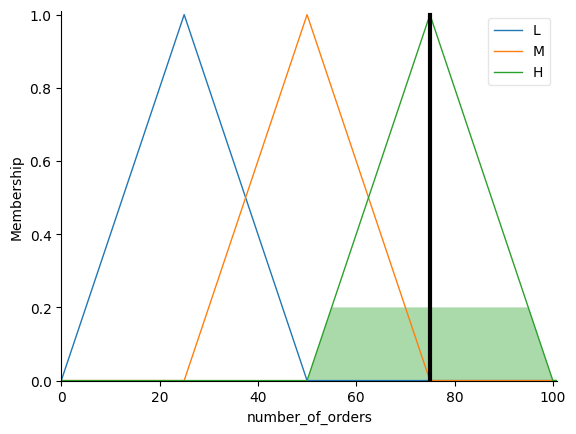

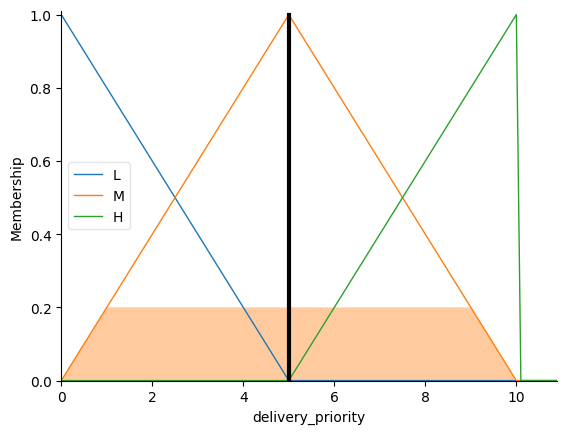

In [11]:
#BT4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
order_density = ctrl.Antecedent(np.arange(0,110,0.1),'order_density')
delivery_urgency = ctrl.Antecedent(np.arange(1,25,0.1),'delivery_urgency')
current_load = ctrl.Antecedent(np.arange(0,101,0.1),'current_load')
traffic = ctrl.Antecedent(np.arange(0,11,0.1),'traffic')
profit_per_delivery = ctrl.Antecedent(np.arange(10,101,0.1),'profit_per_delivery')
number_of_orders = ctrl.Consequent(np.arange(0,101,0.1),'number_of_orders')
delivery_priority = ctrl.Consequent(np.arange(0,11,0.1),'delivery_priority')



order_density['L'] = fuzz.trimf(order_density.universe, [0,20,50])
order_density['M'] = fuzz.trimf(order_density.universe, [40,60,80])
order_density['H'] = fuzz.trimf(order_density.universe, [70,90,100])
delivery_urgency['L'] = fuzz.trimf(delivery_urgency.universe, [1, 5, 12])
delivery_urgency['M'] = fuzz.trimf(delivery_urgency.universe, [6, 12, 17])
delivery_urgency['H'] = fuzz.trimf(delivery_urgency.universe, [15, 17, 24])
current_load['L'] = fuzz.trimf(current_load.universe, [0,20,50])
current_load['M'] = fuzz.trimf(current_load.universe, [40, 60, 80])
current_load['H'] = fuzz.trimf(current_load.universe, [70, 90, 100])
traffic['L'] = fuzz.trimf(traffic.universe, [0, 0, 5])
traffic['M'] = fuzz.trimf(traffic.universe, [0, 5, 10])
traffic['H'] = fuzz.trimf(traffic.universe, [5, 10, 10])
profit_per_delivery['L'] = fuzz.trimf(profit_per_delivery.universe, [10, 30, 50])
profit_per_delivery['M'] = fuzz.trimf(profit_per_delivery.universe, [40, 60, 80])
profit_per_delivery['H'] = fuzz.trimf(profit_per_delivery.universe, [70, 90, 100])
number_of_orders['L'] = fuzz.trimf(number_of_orders.universe, [0,25,50])
number_of_orders['M'] = fuzz.trimf(number_of_orders.universe, [25,50,75])
number_of_orders['H'] = fuzz.trimf(number_of_orders.universe, [50,75,100])
delivery_priority['L'] = fuzz.trimf(delivery_priority.universe, [0,0,5])
delivery_priority['M'] = fuzz.trimf(delivery_priority.universe, [0,5,10])
delivery_priority['H'] = fuzz.trimf(delivery_priority.universe, [5,10,10])



rule1 = ctrl.Rule(order_density['H'] & current_load['L'] & traffic['L'],number_of_orders['H'])
rule2 = ctrl.Rule(order_density['M'] & traffic['H'] & delivery_urgency['M'],number_of_orders['M'])
rule3 = ctrl.Rule(current_load['H'] & order_density['H'] & profit_per_delivery['M'],number_of_orders['M'])
rule4 = ctrl.Rule(order_density['L'] & delivery_urgency['H'] & traffic['M'],number_of_orders['M'])
rule5 = ctrl.Rule(profit_per_delivery['H'] & delivery_urgency['H'] & traffic['H'],number_of_orders['M'])
rule6 = ctrl.Rule(delivery_urgency['H'] & profit_per_delivery['H'] & traffic['H'],delivery_priority['H'])
rule7 = ctrl.Rule(delivery_urgency['M'] & traffic['M'],delivery_priority['M'])
rule8 = ctrl.Rule(delivery_urgency['L'] & order_density['H'] & profit_per_delivery['L'],delivery_priority['L'])


fuzzy_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
sim = ctrl.ControlSystemSimulation(fuzzy_system)
sim.input['order_density'] = 80
sim.input['delivery_urgency'] = 16
sim.input['current_load'] = 35
sim.input['traffic'] = 4
sim.input['profit_per_delivery'] = 70
sim.compute()
print ("muc do ket hop don hang:", sim.output['number_of_orders'])
print ("muc do uu tien:", sim.output['delivery_priority'])
number_of_orders.view(sim)
delivery_priority.view(sim)